#LOGISTIC REGRESSION PROJECT - 2

I will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

I will be trying to predict a classification- survival or deceased.
I will use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

#IMPORTS

In [3]:
#Import Numpy And Pandas
import numpy as mp
import pandas as pd

In [5]:
#Import Matplotlib And Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#GET THE DATA

In [8]:
#Read 'titanic.csv' and set it to a df
df = pd.read_csv('titanic.csv')

In [10]:
#Head Of Df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#EXPLORATORY DATA ANALYSIS

<Axes: >

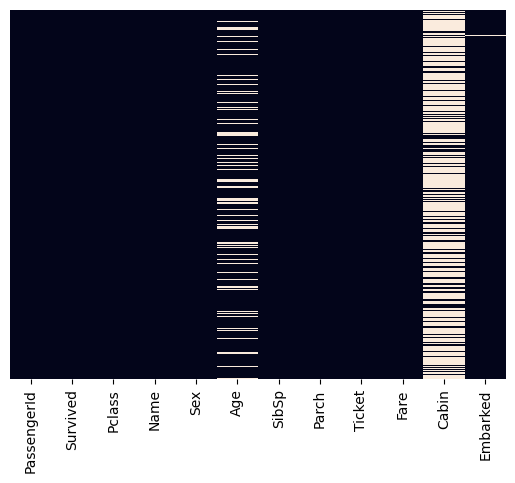

In [13]:
#Let's start by checking missing data
#We can create a heatmap to check where we are missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
#Conclusion -> We can clearly see that we are missing data in age and cabin column.

<Axes: xlabel='Survived', ylabel='count'>

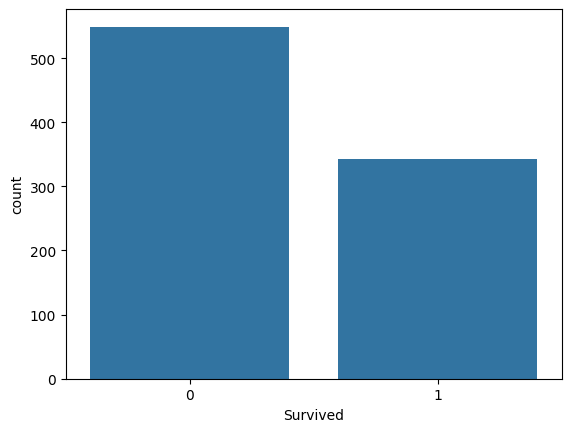

In [15]:
#Countplot Of Survived
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

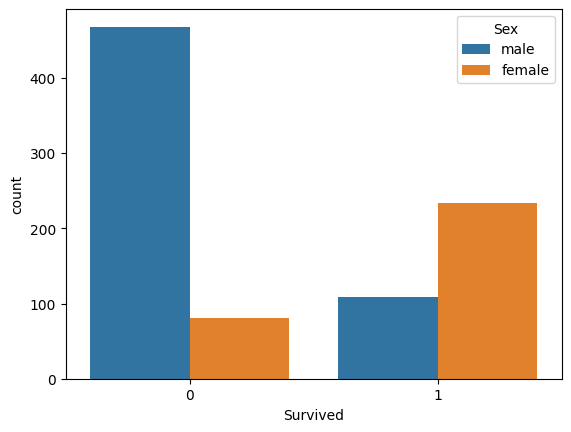

In [19]:
#Countplot of Survived with hue based off sex
sns.countplot(x='Survived',data=df,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

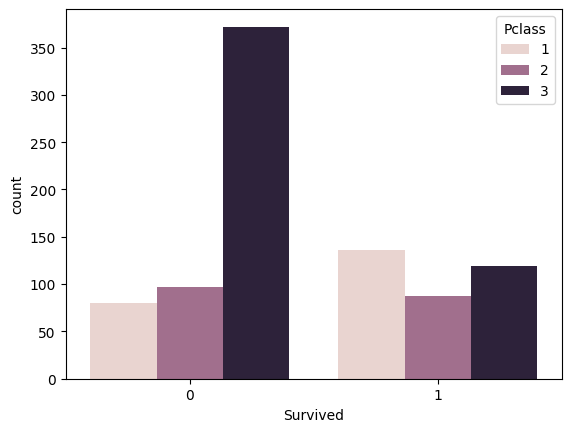

In [21]:
#Countplot of Survived with hue based off Passenger Class
sns.countplot(data=df,x='Survived',hue='Pclass')

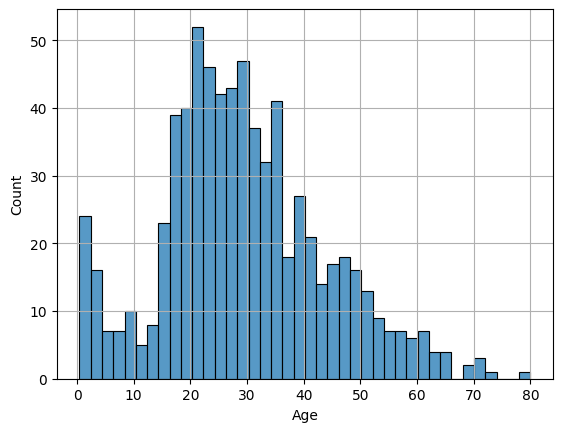

In [23]:
#Histogram Based Off Age
sns.histplot(data=df,x='Age',bins=40)
plt.grid(True)

<Axes: xlabel='SibSp', ylabel='count'>

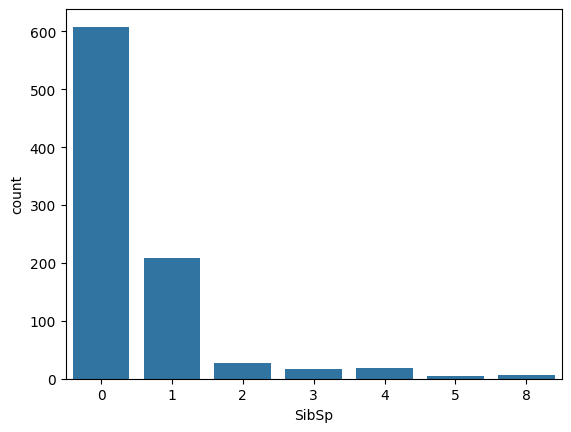

In [27]:
#Countplot based off SibSp
sns.countplot(x='SibSp',data=df)

<Axes: xlabel='Fare', ylabel='Count'>

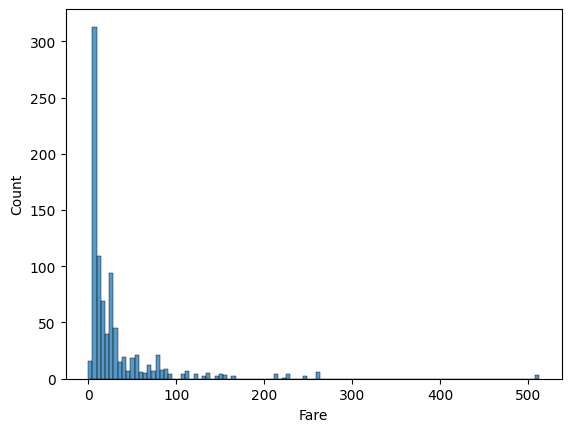

In [29]:
#Histogram of fare
sns.histplot(x='Fare',data=df)

In [31]:
#Cufflinks For Plot
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

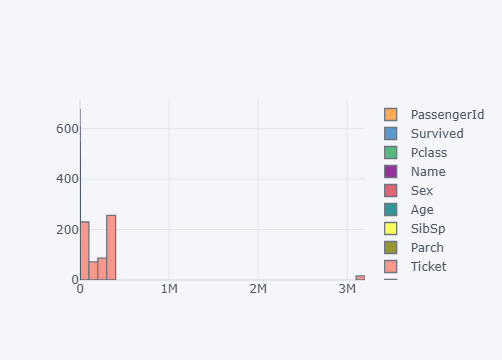

In [33]:
df.iplot(x='Fare',kind='hist')

#DATA CLEANING

I will fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). But, I will check the average age by passenger class.

In [41]:
#Avg. Age For All Classes
first_class_avg=df[df['Pclass']==1]['Age'].mean()
second_class_avg=df[df['Pclass']==2]['Age'].mean()
third_class_avg=df[df['Pclass']==3]['Age'].mean()
print(first_class_avg)
print(second_class_avg)
print(third_class_avg)

38.233440860215055
29.87763005780347
25.14061971830986


In [47]:
for i in range(0, 891):
    curr_class = df.loc[i, 'Pclass']
    if pd.isna(df.loc[i, 'Age']):
        if curr_class == 1:
            df.loc[i, 'Age'] = first_class_avg
        elif curr_class == 2:
            df.loc[i, 'Age'] = second_class_avg
        else:
            df.loc[i, 'Age'] = third_class_avg

<Axes: >

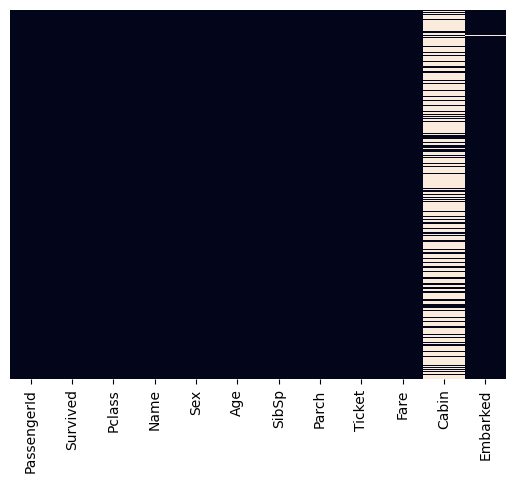

In [51]:
#Now let's see our heatmap again
sns.heatmap(df.isna(),yticklabels=False,cbar=False)

Now let's drop cabin column(due to too many missing values) and that one row in emabrked column

In [57]:
df.drop('Cabin',axis=1,inplace=True)

In [59]:
df.dropna(inplace=True)

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


#Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [69]:
#For converting categorical features to dummy variables
#We also need to remove female as it is directly related to male and we will remove 'C' as it is directly related to 'Q' and 'S'.
sex_mask = pd.get_dummies(df['Sex'],drop_first=True)
embark_mask = pd.get_dummies(df['Embarked'],drop_first=True)
print(sex_mask)
print(embark_mask)

      male
0     True
1    False
2    False
3    False
4     True
..     ...
886   True
887  False
888  False
889   True
890   True

[889 rows x 1 columns]
         Q      S
0    False   True
1    False  False
2    False   True
3    False   True
4    False   True
..     ...    ...
886  False   True
887  False   True
888  False   True
889  False  False
890   True  False

[889 rows x 2 columns]


In [73]:
#Convert True to 1 and False to 0
def convet(n):
    if(n):
        return 1
    return 0
sex_mask['Male']=sex_mask['male'].apply(convet)
embark_mask['q']=embark_mask['Q'].apply(convet)
embark_mask['s']=embark_mask['S'].apply(convet)

In [79]:
#Remove all unnecessary columns in sex_mask and embark_mask
sex_mask.drop('male',axis=1,inplace=True)
embark_mask.drop('Q',axis=1,inplace=True)
embark_mask.drop('S',axis=1,inplace=True)

In [81]:
sex_mask

,Male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [83]:
embark_mask

,q,s
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [85]:
#Remove all unnecessary columns in df
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [87]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [89]:
#Merge all df
df = pd.concat([df,sex_mask,embark_mask],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,q,s
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [94]:
#Let's also drop PassengerId as it doesn't affect survival chance of passenger.
df.drop('PassengerId',axis=1,inplace=True)

In [96]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,q,s
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#Building a Logistic Regression model.

#All the columns except Survived will be our independent variable.

#Survived will be our dependent variable.

In [101]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Male', 'q',
       's'],
      dtype='object')

In [105]:
x = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Male', 'q',
       's']]
y = df['Survived']

In [107]:
x

,Pclass,Age,SibSp,Parch,Fare,Male,q,s
0,3,22.00000,1,0,7.2500,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0
2,3,26.00000,0,0,7.9250,0,0,1
3,1,35.00000,1,0,53.1000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,1,0,1
887,1,19.00000,0,0,30.0000,0,0,1
888,3,25.14062,1,2,23.4500,0,0,1
889,1,26.00000,0,0,30.0000,1,0,0


In [109]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [113]:
#Perform Train test split on data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=101)

In [115]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Male,q,s
807,3,18.00000,0,0,7.7750,0,0,1
651,2,18.00000,0,1,23.0000,0,0,1
2,3,26.00000,0,0,7.9250,0,0,1
690,1,31.00000,1,0,57.0000,1,0,1
196,3,25.14062,0,0,7.7500,1,1,0
...,...,...,...,...,...,...,...,...
576,2,34.00000,0,0,13.0000,0,0,1
840,3,20.00000,0,0,7.9250,1,0,1
338,3,45.00000,0,0,8.0500,1,0,1
524,3,25.14062,0,0,7.2292,1,0,0


In [117]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Male,q,s
511,3,25.140620,0,0,8.05,1,0,1
613,3,25.140620,0,0,7.75,1,1,0
615,2,24.000000,1,2,65.00,0,0,1
337,1,41.000000,0,0,134.50,0,0,0
718,3,25.140620,0,0,15.50,1,1,0
...,...,...,...,...,...,...,...,...
792,3,25.140620,8,2,69.55,0,0,1
828,3,25.140620,0,0,7.75,1,1,0
732,2,29.877630,0,0,0.00,1,0,1
669,1,38.233441,1,0,52.00,0,0,1


In [119]:
y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

In [121]:
y_train

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64

#TRAINING AND PREDICTING

In [124]:
# Importing the Logistic Regression model from the sklearn library
from sklearn.linear_model import LogisticRegression

In [126]:
# Creating a Logistic Regression model with a maximum of 700 iterations for convergence
model = LogisticRegression(max_iter=700)
model

LogisticRegression(max_iter=700)

In [128]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=700)

#PREDICTIONS AND EVALUATIONS

In [131]:
#Predictions For Testing data
predictions = model.predict(x_test)

In [133]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [135]:
#Evaluation With Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 31,  73]], dtype=int64)

In [139]:
#Evaluation With Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



#THANK YOU

#CREATED BY SHAURYA MITTAL